# Regression Analysis for the Ames Housing Dataset

#### Libraries

In [1]:
import pandas as pd
import os
import statsmodels.api as sm
import matplotlib.pyplot as plt

## Load the Data

In [2]:
data_path = os.path.join('..', 'data', 'AmesHousing.csv')
ames = pd.read_csv(data_path)
print(ames.head())

   Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2   NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
3   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
4   NaN       IR1          Lvl  ...         0     NaN  MnPrv          NaN   

  Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0       

In [3]:
#Mutiple Regressions with Lot are and Yr Sold to Predict Sales Price
X = ames[["Lot Area", "Yr Sold"]]
y = ames["SalePrice"]

# Add constant term for intercept
X = sm.add_constant(X)

# Fit regression model
model = sm.OLS(y, X).fit()

# Display summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     112.9
Date:                Sun, 19 Oct 2025   Prob (F-statistic):           5.62e-48
Time:                        16:26:42   Log-Likelihood:                -37123.
No. Observations:                2930   AIC:                         7.425e+04
Df Residuals:                    2927   BIC:                         7.427e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.129e+06   2.17e+06      1.442      0.1

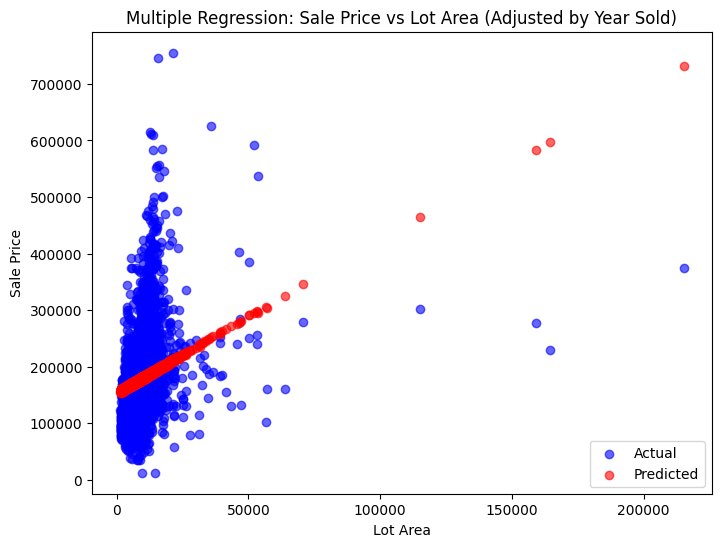

In [4]:
# Create a plot for the regressions
ames["Predicted"] = model.predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(ames["Lot Area"], ames["SalePrice"], color="blue", alpha=0.6, label="Actual")
plt.scatter(ames["Lot Area"], ames["Predicted"], color="red", alpha=0.6, label="Predicted")

plt.xlabel("Lot Area")
plt.ylabel("Sale Price")
plt.title("Multiple Regression: Sale Price vs Lot Area (Adjusted by Year Sold)")
plt.legend()
plt.show()

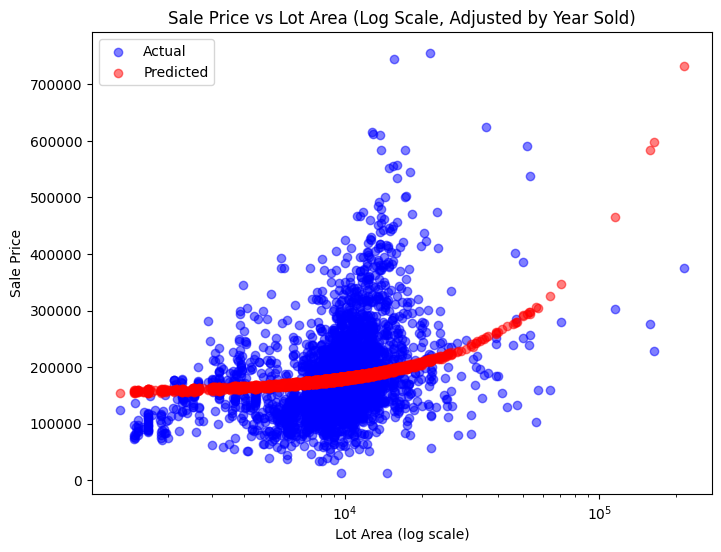

: 

In [ ]:
# First plot better with a log transformation
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(ames["Lot Area"], ames["SalePrice"], color="blue", alpha=0.5, label="Actual")
plt.scatter(ames["Lot Area"], ames["Predicted"], color="red", alpha=0.5, label="Predicted")

plt.xscale('log')
plt.xlabel("Lot Area (log scale)")
plt.ylabel("Sale Price")
plt.title("Sale Price vs Lot Area (Log Scale, Adjusted by Year Sold)")
plt.legend()
plt.show()

### Regression Results Summary

The goal of this analysis is to understand the impact of various housing factors on the home's Sale Price. We used the `AmesHousing.csv` dataset.

A multiple linear regression was performed to predict SalePrice based on Lot Area and Year Sold. The model explains about 7.2% of the variation in sale price (R² = 0.072), indicating a weak overall fit.

- Lot Area is a significant positive predictor of SalePrice (*p* < 0.001), meaning that larger lot sizes are generally associated with higher home prices.  
- Year Sold is not a statistically significant predictor (*p* = 0.170), suggesting that after accounting for lot size, the sale year does not meaningfully impact price.  
- The plot shows that predicted prices (red) follow a smooth increasing curve with lot area, while the actual prices (blue) vary widely—indicating that many other unmodeled factors (such as quality, condition, or neighborhood) affect price.

Overall, while the model demonstrates a weak but statistically significant relationship between lot area and sale price, it leaves most of the variation unexplained, suggesting the need for additional predictors to improve accuracy.
